# Stresses

In [1]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info);

### Initialize FPP v1_demount case
[FPP v1 demount case documentation](https://fuse.help/cases.html#FPP)

In [2]:
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);

In [3]:
# FPP TF and OH are free-standing
ini.center_stack

center_stack{Float64}
├─ bucked ➡ false
├─ noslip ➡ false
└─ plug ➡ false


In [4]:
# Here is the radial build
ini.build.layers

OrderedCollections.OrderedDict{Any, Any} with 28 entries:
  "gap_OH"                                 => 1.18014
  "OH"                                     => 0.35555
  "gap_TF_OH"                              => 0.0689205
  "hfs_TF"                                 => 0.30748
  "hfs_gap_low_temp_shield_TF"             => 0.0689205
  "hfs_low_temp_shield"                    => 0.42419
  "hfs_gap_vacuum_vessel_low_temp_shield"  => 0.0689205
  "hfs_vacuum_vessel_wall_outer"           => 0.02
  "hfs_vacuum_vessel"                      => 0.132301
  "hfs_vacuum_vessel_wall_inner"           => 0.02
  "hfs_gap_high_temp_shield_vacuum_vessel" => 0.0689205
  "hfs_high_temp_shield"                   => 0.206761
  "hfs_blanket"                            => 0.33162
  "hfs_first_wall"                         => 0.02
  "plasma"                                 => 3.10142
  "lfs_first_wall"                         => 0.02
  "lfs_blanket"                            => 0.765401
  "lfs_high_temp_shield" 

In [5]:
# remove gap between TF and OH, so that we can buck them together
pop!(ini.build.layers, "gap_TF_OH");
ini.build.layers

OrderedCollections.OrderedDict{Any, Any} with 27 entries:
  "gap_OH"                                 => 1.18014
  "OH"                                     => 0.35555
  "hfs_TF"                                 => 0.30748
  "hfs_gap_low_temp_shield_TF"             => 0.0689205
  "hfs_low_temp_shield"                    => 0.42419
  "hfs_gap_vacuum_vessel_low_temp_shield"  => 0.0689205
  "hfs_vacuum_vessel_wall_outer"           => 0.02
  "hfs_vacuum_vessel"                      => 0.132301
  "hfs_vacuum_vessel_wall_inner"           => 0.02
  "hfs_gap_high_temp_shield_vacuum_vessel" => 0.0689205
  "hfs_high_temp_shield"                   => 0.206761
  "hfs_blanket"                            => 0.33162
  "hfs_first_wall"                         => 0.02
  "plasma"                                 => 3.10142
  "lfs_first_wall"                         => 0.02
  "lfs_blanket"                            => 0.765401
  "lfs_high_temp_shield"                   => 0.206761
  "lfs_gap_high_temp_shiel

In [6]:
# initialize
dd = FUSE.init(ini, act);

27×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume    
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.21821     0.0       1.21821                16.1827      61.933
   2 │ in                            oh        0.367019    1.21821   1.58523  ReBCO          4.8755      42.9397
   3 │ hfs                           tf        0.317399    1.58523   1.90262  ReBCO         10.5692     105.272
   4 │ hfs                                     0.0711437   1.90262   1.97377                 3.97298    142.387
   5 │ hfs     low temp              shield    0.437874    1.97377   2.41164  Tungsten      13.1994     395.865
   6 │ hfs                                     0.0711437   2.41164   2.48279      

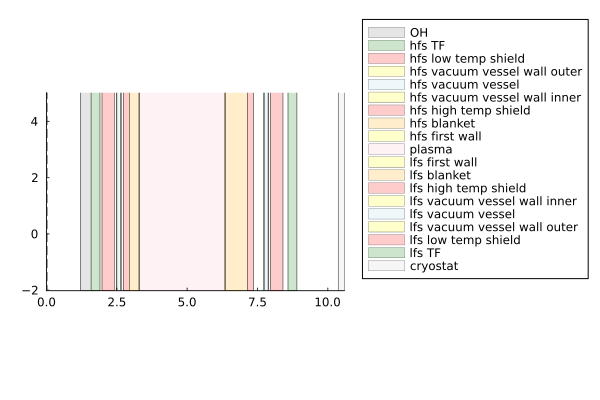

In [7]:
# print the radial build as a table
display(dd.build.layer)
# plot the radial build (OH and hfs TF are touching)
plot(dd.build; cx=false)

### Run some of the actors needed to evaluate the stresses

In [8]:
FUSE.ActorEquilibriumTransport(dd, act)
FUSE.ActorFluxSwing(dd, act);

### Run the Stresses actor
[ActorStresses documentation](https://fuse.help/actors.html#Stresses)

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 36.3 [keV]               ne0 → 1.52e+20 [m⁻³]           
a → 1.38 [m]                   ip → 9.01 [MA]                 Ti0 → 36.3 [keV]               ne_ped → 1.13e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 4.72                     <Te> → 14.2 [keV]              <ne> → 1.29e+20 [m⁻³]          
κ → 2.29                       βpol → 2.75                    <Ti> → 14.2 [keV]              ne0/<ne> → 1.18                
δ → 0.85                       βtor → 0.0681                  Te0/<Te> → 2.55                fGW → 0.903                    
ζ → 0.0585                     βn → 4.91                      Ti0/<Ti> → 2.55                zeff_ped → 2                   


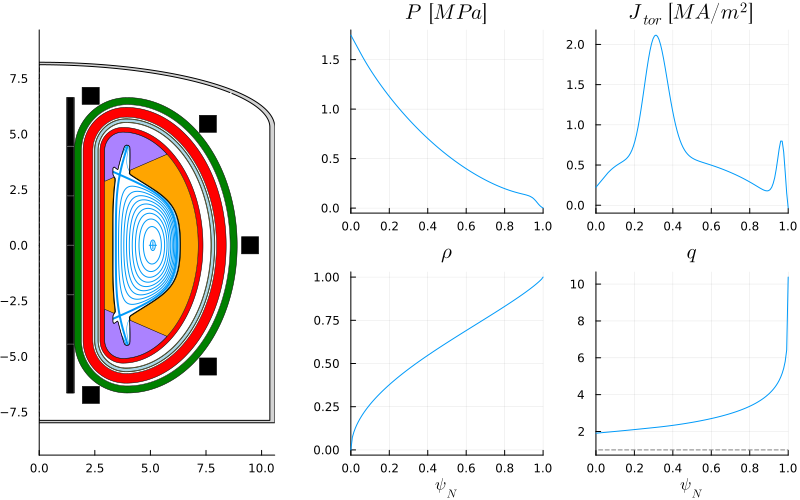

​


27×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume    
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.21821     0.0       1.21821                16.1827      61.933
   2 │ in                            oh        0.367019    1.21821   1.58523  ReBCO          4.8755      42.9397
   3 │ hfs                           tf        0.317399    1.58523   1.90262  ReBCO         10.5692     105.272
   4 │ hfs                                     0.0711437   1.90262   1.97377                 3.97298    142.387
   5 │ hfs     low temp              shield    0.437874    1.97377   2.41164  Tungsten      13.1994     395.865
   6 │ hfs                                     0.0711437   2.41164   2.48279      

​


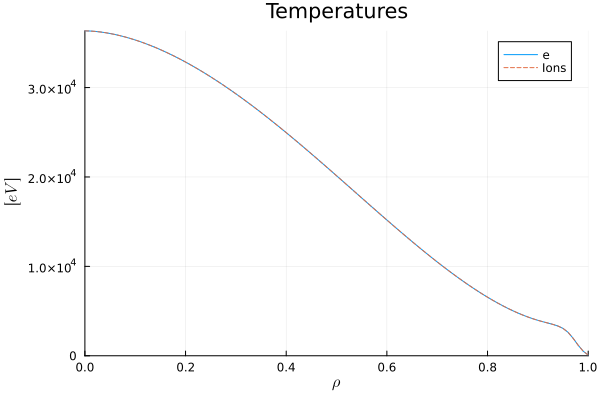

​


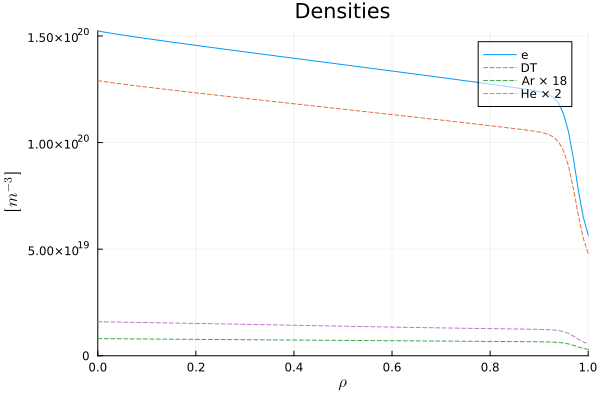

​


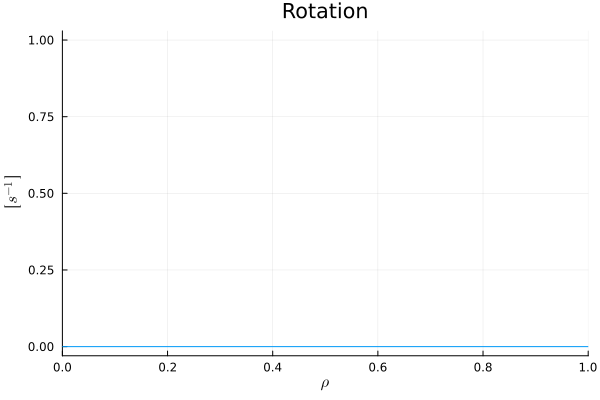

​


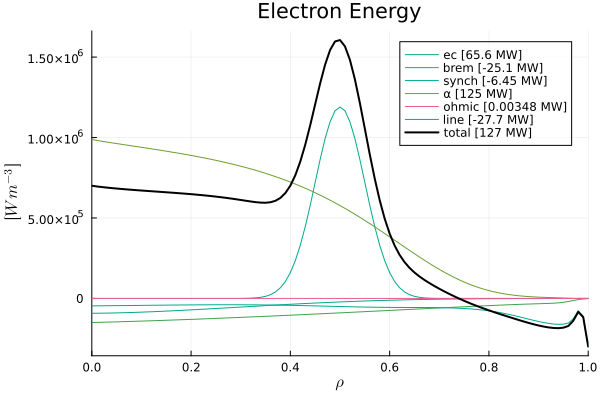

​


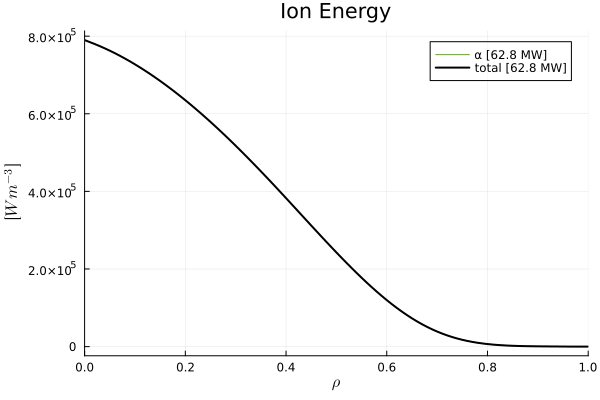

​


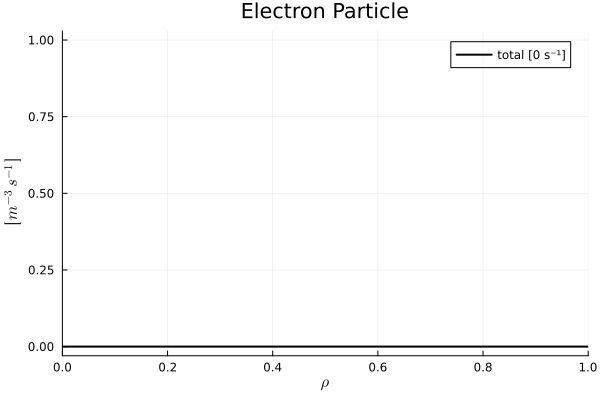

​


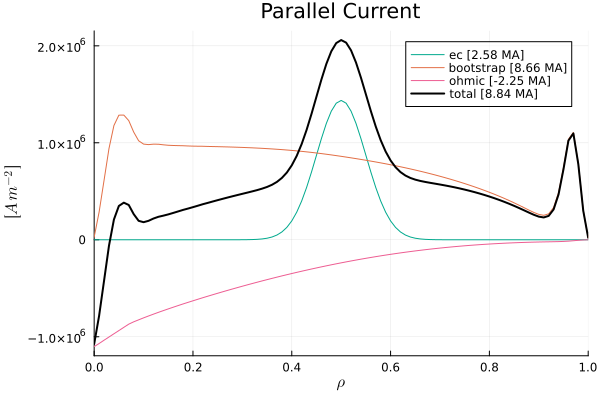

​


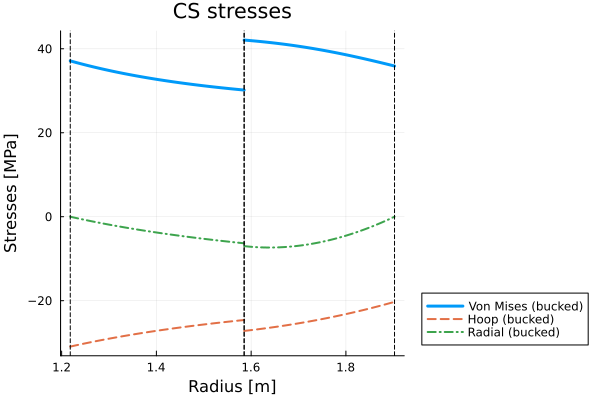

In [11]:
act.ActorStresses.n_points = 51

dd.solid_mechanics.center_stack.plug = 0
dd.solid_mechanics.center_stack.bucked = 0
dd.solid_mechanics.center_stack.noslip = 0

plot(size=(800, 500))

# free standing
FUSE.ActorStresses(dd, act)
plot!(dd.solid_mechanics.center_stack.stress, color=:blue)

# add bucking
dd.solid_mechanics.center_stack.bucked = 1
FUSE.ActorStresses(dd, act)
plot!(dd.solid_mechanics.center_stack.stress, color=:red)

FUSE.digest(dd)
